# Decision Tree
> ML algorithm for both classification and regression



## Train & Visualize model
* Training 된 Model을 graphviz tool을 이용하여 시각화 할 수 있다. 
  * model -> .dot file /w graphviz_export
  * .dot file -> png /w graphviz tool (dot) 
```shell
$ dot -Tpng file.dot -o file.png
```

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = load_iris()
print(list(iris))
X=iris['data']
y=iris['target']

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

dt_clf.predict(X)

export_graphviz(dt_clf, out_file='iris_tree.dot', feature_names=iris['feature_names'], class_names=iris["target_names"], rounded=True, filled=True)




['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


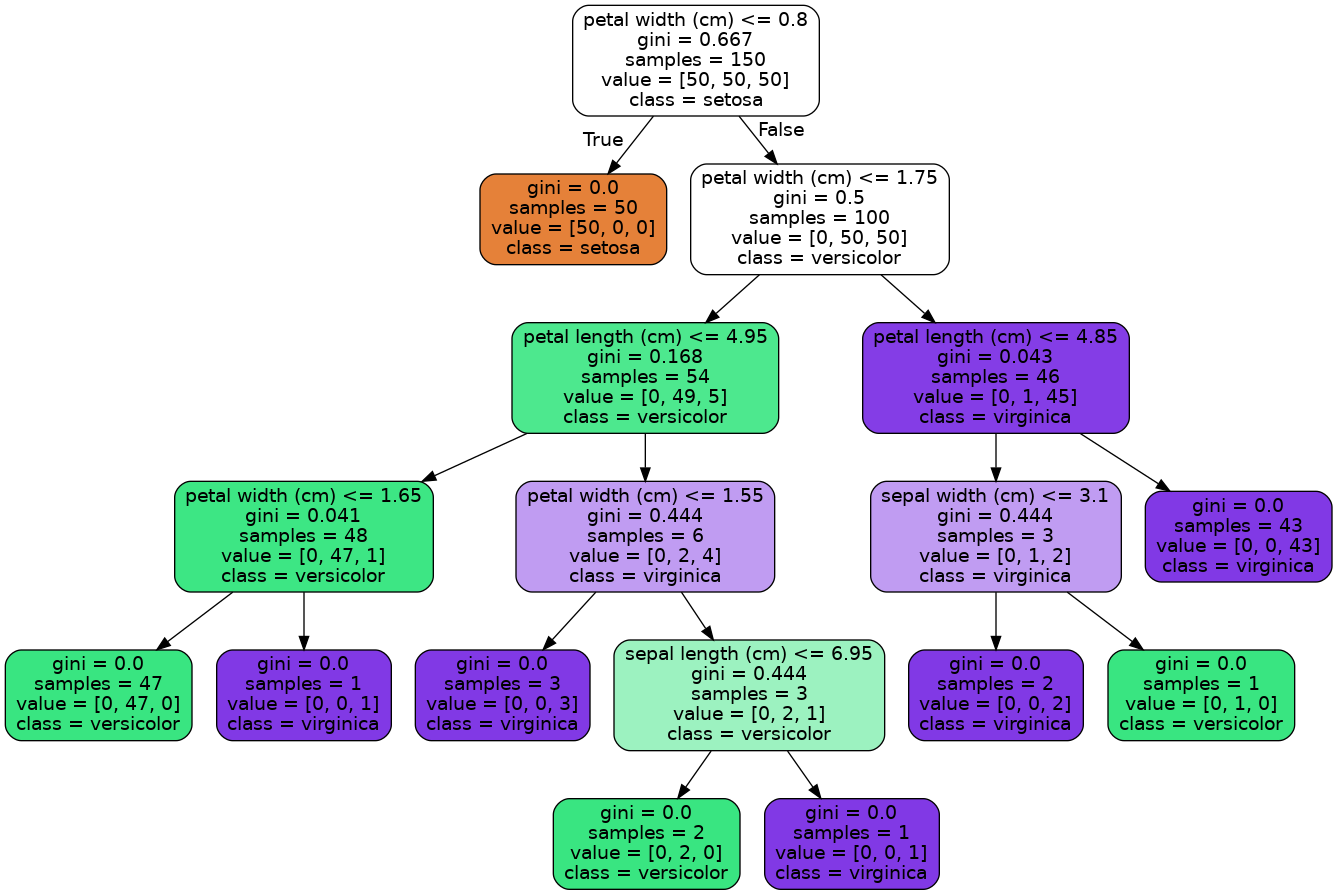

## Decision Tree Visualization in detail
* Node attributes
  * samples : 해당 Node에 속하는 데이터 training instance의 갯수 
  * gini : impurity of the node 즉, 해당 node에 얼마나 많은 class가 포함되는지의 척도 (if gini = 0, 해당 node에 하나의 class만 존재, 작을 수록 더욱 impurity가 적다는 뜻) => cross entropy를 사용하기도 함. 

## CART (**C**lassification **A**nd **R**egression **T**ree)
* Training set을 2로 나누고 양측의 impurity를 최소화하는 feature k와 이의 threshold 값을 찾는 동작을 반복
* finding optimal tree => NP Complete problem O(exp(m)) 
* 따라서 greedy algorithm을 통해 '적당히 쓸만한 solution'을 찾는 형태로 실제 구현되어 있다. 
* **즉, 결과물이 최적임을 보장할 수 없다**

## Hyperparameters 
* criterion 
  * values : entropy* or *gini* (default)
> CART에서 impurity를 산출하는 방식을 정의한다. 일반적으로 큰 차이가 없으나

 * gini
    * 연산 속도 측면에서 entropy 대비 조금 우세
    * tree의 depth가 entropy 보다 조금 더 커지는 경향이 존재

  * **트레이닝 연산의 최적 측면에서는 gini 추론 연산 최적 측면에서는 entropy**
* max_depth : decision tree의 max depth를 규정
* min_samples_split : node가 split (child node로 가지를 치기)을 하기 위한 최소 샘플 갯수
* min_samples_leaf (=min_weight_fraction_leaf) : leaf node가 가질 최소의 sample 갯수 (많을 수록 depth가 얕아지게 됨)
* max_leaf_node : 최대 leaf node 객수 
* max_features : 최대 feature 갯수 



## Regressor
* Cost Function에서 Impurity 대신 MSE를 최소화 한다는 것만 제외하고 CART algorithm의 적용 방식은 대부분 유사


## Instability 
* Data의 boundary가 axis에 직각 혹은 수평이 되지 않는 경우 불필요한 간섭이 발생되며 이로 인해 모델의 성능이 떨어짐.
   * 이러한 단점을 보완할 수 있는 방법으로 PCA 같은 방법이 있음 (Chapter 8)
* Data의 작은 변화에 민감함
   * 이를 보완하기 위하여 Random Forest라는 방식을 사용

## Exercise

### Train and fine-tune a Decision Tree model for moon dataset


In [8]:
from sklearn.datasets import make_moons

moon_X,moon_y = make_moons(n_samples=10000, noise=0.4)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV


sss = StratifiedShuffleSplit(n_splits=1, random_state=10, test_size=0.2)
for train_index, test_index in sss.split(moon_X, moon_y):
  train_X, test_X = moon_X[train_index], moon_X[test_index]
  train_Y, test_Y = moon_y[train_index], moon_y[test_index]




In [10]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

dt_clf = DecisionTreeClassifier()
param_grid = {
    "max_leaf_nodes": range(30, 40),
    "min_weight_fraction_leaf": np.logspace(1, 2, num=10, endpoint=True, base=0.04)
}
search = GridSearchCV(dt_clf, param_grid)
search.fit(train_X, train_Y)

print("- Param Grid {}".format(param_grid))
print("- Best Parameter {} /w score {}".format(search.best_params_, search.best_score_))
validation_Y = search.best_estimator_.predict(test_X)






- Param Grid {'max_leaf_nodes': range(30, 40), 'min_weight_fraction_leaf': array([0.04      , 0.02797263, 0.0195617 , 0.01367981, 0.00956651,
       0.00669001, 0.00467843, 0.0032717 , 0.00228795, 0.0016    ])}
- Best Parameter {'max_leaf_nodes': 36, 'min_weight_fraction_leaf': 0.0066900082476029875} /w score 0.8618750000000001


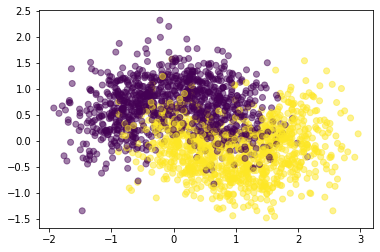

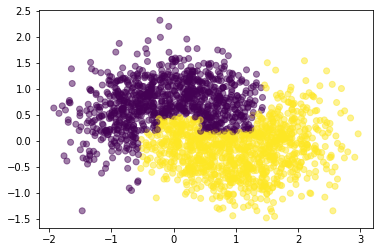

Accuracy against validation set : 0.8665


In [11]:
from sklearn.metrics import accuracy_score
plt.scatter(test_X[:,0], test_X[:,1], c=test_Y, alpha=0.5)
plt.show()

plt.scatter(test_X[:,0], test_X[:,1], c=validation_Y, alpha=0.5)
plt.show()

print("Accuracy against validation set : {}".format(accuracy_score(validation_Y, test_Y)))


### Grow a forest

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.1)
sub_train_X = []
sub_train_Y = []
for train_index, test_index in sss.split(train_X, train_Y):
  sub_train_X.append(train_X[train_index][:100])
  sub_train_Y.append(train_Y[train_index][:100])

forest_clf = []
for i in range(0,1000):
  search.fit(sub_train_X[i], sub_train_Y[i])
  forest_clf.append(search.best_estimator_)
  print(i)





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1]:
from scipy.stats import mode
pred = None
for model in forest_clf:
  if pred is None:
    pred = model.predict(test_X)
  else:
    pred = model.predict(test_X)  + pred
pred = mode(pred)
score = accuracy_score(pred.astype(int), test_Y)
print("Forest Score : {}".format(score))



  
  

NameError: ignored